In [3]:
import numpy as np
import pandas as pd

In [5]:
#피처 이름 파일 읽어오기
feature_name_df = pd.read_csv('/content/drive/MyDrive/data/UCI_HAR_Dataset/UCI_HAR_Dataset/features.txt', sep = '\s+', header = None, names = ['index', 'feature_name'], engine = 'python')
feature_name_df.head()

,index,feature_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [6]:
feature_name_df.shape

(561, 2)

In [8]:
#index는 제거하고 featuer_name만 리스트로 저장
feature_name = feature_name_df.iloc[:, 1].values.tolist()
feature_name[:5]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y']

In [17]:
X_train = pd.read_csv('/content/drive/MyDrive/data/UCI_HAR_Dataset/UCI_HAR_Dataset/train/X_train.txt', delim_whitespace = True, header = None, encoding = 'latin-1')
X_train.colums = feature_name
X_test = pd.read_csv('/content/drive/MyDrive/data/UCI_HAR_Dataset/UCI_HAR_Dataset/test/X_test.txt', delim_whitespace = True, header = None, encoding = 'latin-1')
X_test.colums = feature_name

Y_train = pd.read_csv('/content/drive/MyDrive/data/UCI_HAR_Dataset/UCI_HAR_Dataset/train/y_train.txt', sep = '\s+', header = None, names = ['action'], engine = 'python')
Y_test = pd.read_csv('/content/drive/MyDrive/data/UCI_HAR_Dataset/UCI_HAR_Dataset/test/y_test.txt', sep = '\s+', header = None, names = ['action'], engine = 'python')

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

/tmp/ipython-input-76091021.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('/content/drive/MyDrive/data/UCI_HAR_Dataset/UCI_HAR_Dataset/train/X_train.txt', delim_whitespace = True, header = None, encoding = 'latin-1')
/tmp/ipython-input-76091021.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X_train.colums = feature_name
/tmp/ipython-input-76091021.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv('/content/drive/MyDrive/data/UCI_HAR_Dataset/UCI_HAR_Dataset/test/X_test.txt', delim_whitespace = True, header = None, encoding = 'latin-1')
/tmp/ipython-input-76091021.py:4: UserWarning: Pandas doesn't allow columns to be create

((7352, 561), (7352, 1), (2947, 561), (2947, 1))

In [18]:
Y_train.columns=['action']
Y_train.head()

,action
0,5
1,5
2,5
3,5
4,5


In [19]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [20]:
print(Y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


In [22]:
label_name_df = pd.read_csv('/content/drive/MyDrive/data/UCI_HAR_Dataset/UCI_HAR_Dataset/activity_labels.txt', sep = '\s+', header = None, names = ['index', 'label'], engine = 'python')

#index는 제거하고 feature_name만 리스트로 저장
label_name = label_name_df.iloc[:, 1].values.tolist()
label_name

['WALKING',
 'WALKING_UPSTAIRS',
 'WALKING_DOWNSTAIRS',
 'SITTING',
 'STANDING',
 'LAYING']

In [25]:
from sklearn.tree import DecisionTreeClassifier

#결정 트리 분류 분석 : 모델 생성
dt_HAR = DecisionTreeClassifier(random_state = 156)

#결정 트리 분류 분석 : 모델 훈련
dt_HAR.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=156)

In [26]:
#결정 트리 분류 분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과로 Y_predict 구하기
Y_predict = dt_HAR.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_predict)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

결정 트리 예측 정확도 : 0.8548


In [29]:
print('결정 트리의 현재 하이퍼 매개별수 : \n', dt_HAR.get_params())

결정 트리의 현재 하이퍼 매개별수 : 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 156, 'splitter': 'best'}


In [30]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth' : [6, 8, 10, 12, 16, 20, 24]}
grid_cv = GridSearchCV(dt_HAR, param_grid = params, scoring = 'accuracy', cv = 5, return_train_score = True)
grid_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [31]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844271
4,16,0.850255
5,20,0.850120
6,24,0.849168


In [32]:
print('최고 평균 정확도: {0:.4f}, 최적 하이퍼 매개변수: {1}'.format(grid_cv.best_score_, grid_cv.best_params_))

최고 평균 정확도: 0.8512, 최적 하이퍼 매개변수: {'max_depth': 10}


In [33]:
params = {'max_depth' : [8, 16, 20], 'min_samples_split' : [8, 16, 24]}
grid_cv = GridSearchCV(dt_HAR, param_grid = params, scoring = 'accuracy', cv = 5, return_train_score = True)
grid_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [8, 16, 20],
                         'min_samples_split': [8, 16, 24]},
             return_train_score=True, scoring='accuracy')

In [34]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth', 'param_min_samples_split', 'mean_test_score', 'mean_train_score']]

,param_max_depth,param_min_samples_split,mean_test_score,mean_train_score
0,8,8,0.852023,0.981468
1,8,16,0.854879,0.979836
2,8,24,0.851342,0.978237
3,16,8,0.844136,0.994457
4,16,16,0.847127,0.990479
5,16,24,0.849439,0.986772
6,20,8,0.846040,0.994491
7,20,16,0.848624,0.990479
8,20,24,0.849167,0.986772


In [35]:
print('최고 평균 정확도: {0:.4f}, 최적 하이퍼 매개변수: {1}'.format(grid_cv.best_score_, grid_cv.best_params_))

최고 평균 정확도: 0.8549, 최적 하이퍼 매개변수: {'max_depth': 8, 'min_samples_split': 16}


In [36]:
best_dt_HAR = grid_cv.best_estimator_
best_Y_predict = best_dt_HAR.predict(X_test)
best_accuracy = accuracy_score(Y_test, best_Y_predict)

print('best 결정 트리 예측 정확도: {0:.4f}'.format(best_accuracy))

best 결정 트리 예측 정확도: 0.8717


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

feature_importance_values = best_dt_HAR.feature_importances_
feature_importance_values_s = pd.Series(feature_importance_values, index = X_train.columns)
feature_top10 = feature_importance_values_s.sort_values(ascending = False)[:10]

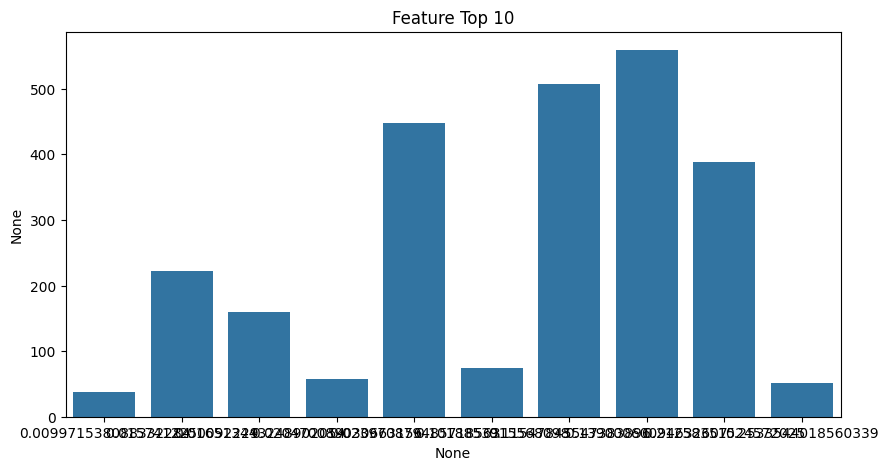

In [42]:
plt.figure(figsize = (10, 5))
plt.title('Feature Top 10')
sns.barplot(x = feature_top10, y = feature_top10.index)
plt.show()

In [43]:
!pip install graphviz

In [44]:
from sklearn.tree import export_graphviz

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일 생성
export_graphviz(best_dt_HAR, out_file = 'tree.dot', class_names = label_name, feature_names = feature_name, impurity = True, filled = True)

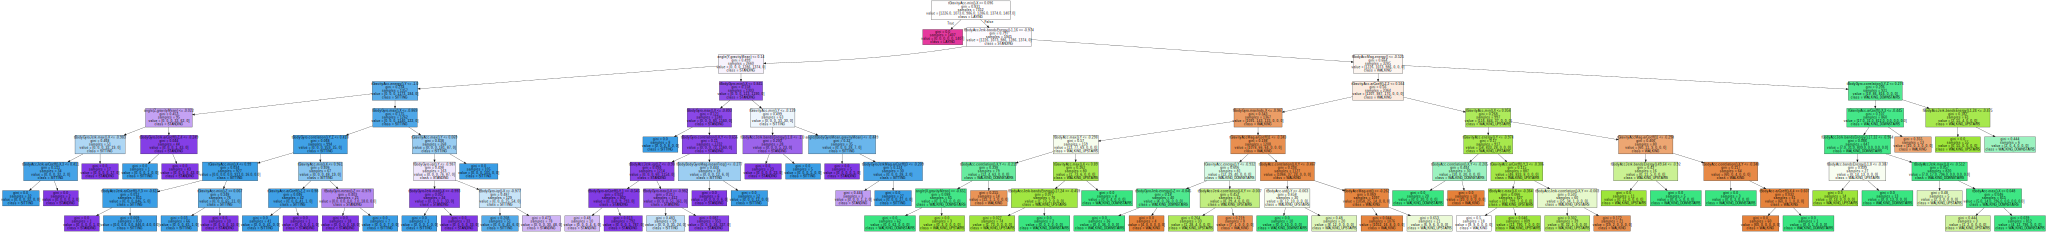

In [45]:
import graphviz

#위에서 생성된 tree.dot 파일을 읽어서 graphviz를 사용하여 시각화
with open("tree.dot") as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)